In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [100]:
top = pd.read_csv('top200.csv')
bottom = pd.read_csv('bottom200.csv')
top['type'] = 1 # 1 for top
bottom['type'] = 0 # 0 for bottom
df = pd.concat([top, bottom], ignore_index=True)
df.head()

,title,artist,genre,rank,danceability,energy,key,loudness,mode,speechiness,...,tempo,duration_ms,time_signature,lyrics,winter,spring,summer,autumn,id,type
0,TOUT VA BIEN (feat. Ninho & Naps),Alonzo,rap,1,0.660,0.720,3.0,-5.874,0.0,0.0753,...,99.937,192960.0,4.0,"[Paroles de ""TOUT VA BIEN"" ft. Naps & Ninho] [...",0,1,0,0,6OZwia8loN0aPS0vTvsBjR,1
1,FADE UP,ZEG P,autre,2,0.758,0.599,4.0,-5.990,0.0,0.0877,...,129.960,219188.0,4.0,"[Paroles de ""FADE UP"" ft. Hamza & SCH] [Intro ...",0,0,1,0,4ZpIuzx91EAPK3VimONbfB,1
2,DIE,Gazo,rap,3,0.695,0.630,8.0,-7.160,0.0,0.0350,...,130.968,240413.0,4.0,"[Paroles de ""DIE""] [Intro] La mala est gangx E...",0,0,1,0,3D29kjUyWxsT3jUUTtARVQ,1
3,PETETE,Gambi,rap,4,0.752,0.669,10.0,-9.817,0.0,0.2510,...,155.997,123846.0,4.0,"[Paroles de ""PETETE""] [Intro] Pew Grr Pew pew ...",0,0,1,0,0z3bi63SNZ5ylyHOzb81Uq,1
4,Time Time,Trei Degete,autre,5,0.715,0.799,0.0,-6.447,0.0,0.0433,...,128.925,156373.0,4.0,"[Paroles de ""Time Time""] [Couplet 1 : Squeezie...",0,0,0,1,5wKDPtbdggE1roeVp3UdXX,1


In [101]:
df = df.drop(['title', 'artist', 'rank', 'lyrics', 'id'], axis = 1)
df = pd.get_dummies(df, columns=['genre'])
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,spring,summer,autumn,type,genre_autre,genre_hip hop,genre_pop,genre_r&b,genre_rap,genre_rock
0,0.660,0.720,3.0,-5.874,0.0,0.0753,0.3010,0.000000,0.2260,0.628,...,1,0,0,1,0,0,0,0,1,0
1,0.758,0.599,4.0,-5.990,0.0,0.0877,0.5700,0.000001,0.1290,0.557,...,0,1,0,1,1,0,0,0,0,0
2,0.695,0.630,8.0,-7.160,0.0,0.0350,0.2290,0.000000,0.1180,0.550,...,0,1,0,1,0,0,0,0,1,0
3,0.752,0.669,10.0,-9.817,0.0,0.2510,0.1670,0.000000,0.0795,0.627,...,0,1,0,1,0,0,0,0,1,0
4,0.715,0.799,0.0,-6.447,0.0,0.0433,0.0141,0.003500,0.3420,0.916,...,0,0,1,1,1,0,0,0,0,0


In [102]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=True) * 100

genre_rock          0.000000
genre_r&b           0.000000
genre_pop           0.000000
genre_hip hop       0.000000
genre_autre         0.000000
type                0.000000
autumn              0.000000
summer              0.000000
spring              0.000000
winter              0.000000
genre_rap           0.000000
time_signature      0.042159
danceability        0.042159
valence             0.042159
liveness            0.042159
instrumentalness    0.042159
acousticness        0.042159
speechiness         0.042159
mode                0.042159
loudness            0.042159
key                 0.042159
energy              0.042159
tempo               0.042159
duration_ms         0.042159
dtype: float64

In [103]:
def fill_empty(df):

    fill0 = ['time_signature','duration_ms','tempo','valence','danceability','acousticness','speechiness','mode', 'loudness', 'key', 'energy',
            'instrumentalness', 'liveness']

    for col in fill0:
        df[col].fillna(0, inplace=True)
        
    return df

In [104]:
df = fill_empty(df)

In [105]:
df.shape

(2372, 24)

In [106]:
X = df.drop('type', axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [107]:
from sklearn.preprocessing import RobustScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif 
model = make_pipeline(RobustScaler(), SelectKBest(f_classif, k=23), LogisticRegression(max_iter=1000))

In [108]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [109]:
def evaluation(model):

    model.fit(X_train, y_train)
        
    ypred = model.predict(X_test)
        
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

In [110]:
evaluation(model)

[[ 74 122]
 [ 53 226]]
              precision    recall  f1-score   support

           0       0.58      0.38      0.46       196
           1       0.65      0.81      0.72       279

    accuracy                           0.63       475
   macro avg       0.62      0.59      0.59       475
weighted avg       0.62      0.63      0.61       475



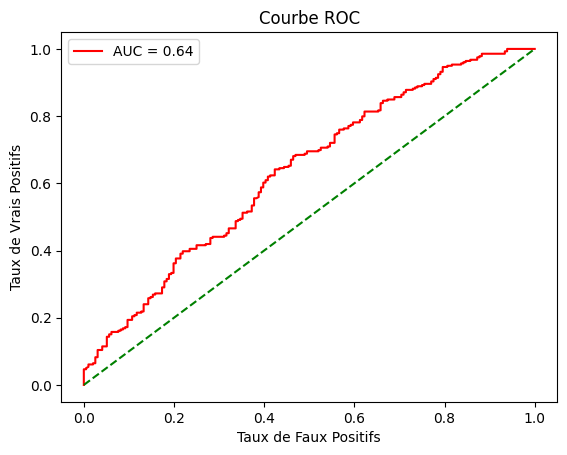

In [111]:
# Importation de la fonction qui permet de calculer les valeurs de la courbe
from sklearn.metrics import roc_curve, auc
# Calcul des faux positifs et vrais positifs en fonction des seuils
y_prob = model.predict_proba(X_test)
probs = y_prob[:, 1]
faux_positifs, vrais_positifs, seuils = roc_curve(y_test, probs)
# Calcul de l'aire sous la courbe
roc_auc = auc(faux_positifs, vrais_positifs)
# Visualisation de la courbe ROC
plt.plot(faux_positifs, vrais_positifs, color='red', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [112]:
# Affichage des coefficients
pd.DataFrame(np.concatenate([model.named_steps['logisticregression'].intercept_.reshape(-1,1),
 model.named_steps['logisticregression'].coef_],axis=1),
 index = ["coef"],
 columns = ["constante"]+list(X.columns)).T.sort_values(by="coef",ascending=False, key=abs)

,coef
genre_autre,1.107292
genre_rock,-0.878494
constante,0.388934
genre_pop,-0.269307
loudness,0.263012
genre_hip hop,0.259703
danceability,0.240021
summer,0.231291
genre_rap,-0.216097
mode,-0.202257
